<div align = 'center'> Project 1 - Linear Regression and Model Comparison (LBA) 
    
<div align = 'center'> Macbeth K. Matibe
    
<div align = 'center'> Minerva University
    
<div align = 'center'> CS146: Computational Methods for Bayesian Statistics
    
<div align = 'center'> Prof. Volkan
    
<div align = 'center'> October 21, 2023

### Executive Summary: Housing Data Analysis

---


**Objective:**

The primary goal of this analysis was to understand the relationship between the distance to the nearest MRT station (`X3`) and the house price of unit area (`Y`), and to develop models that accurately predict house prices based on this distance.

**Key Findings:**

1. **Linear Relationship**: Initial exploration of the data showed a potential linear relationship between the distance to the nearest MRT station and house prices. A straightforward linear regression was fit to the data, providing a basic understanding of this trend.

2. **Presence of Outliers**: The data exhibited some anomalies which could potentially skew the results of a standard linear regression. To account for this, a robust linear regression was conducted, which is less sensitive to outliers.

3. **Complex Relationships**: A quadratic regression was explored to capture potential non-linear relationships in the data. This model assumes that the relationship between distance and house price is not just a straight line but may have some curvature.

4. **Robust Quadratic Model**: A robust version of the quadratic model was also developed to combine the benefits of capturing non-linear relationships while also being resilient to outliers.

5. **Outlier Model**: A specialized outlier model was introduced, focusing explicitly on the potential outliers in the dataset. This model assigns a probability to each data point indicating its likelihood of being an outlier.

**Model Evaluation and Comparison:**

- **WAIC**: The widely applicable information criterion (WAIC) was used to compare the models. Lower WAIC values indicate a better model fit. Based on WAIC, [mention the best model based on your results].

- **PSIS-LOO**: PSIS leave-one-out cross-validation was another metric employed for model comparison. Like WAIC, a lower value indicates a preferable model. [mention the best model based on your results].

**Visual Analysis**: Various plots were generated to visually compare the fit of each model to the data. These visualizations reinforced the quantitative comparisons, providing a clear picture of which models fit the data best.

**Recommendations and Conclusions**:

1. [The best model based on WAIC and PSIS-LOO] is recommended for predicting house prices based on distance to the nearest MRT station.
   
2. The presence of outliers suggests that while distance to MRT stations is a significant factor, other external factors might influence house prices. Further analysis may be needed to identify and account for these factors.
   
3. The quadratic and robust quadratic models indicate that the relationship between distance and house price isn't strictly linear. As the distance increases, the rate at which the house price changes might also vary.

4. Stakeholders looking to set house prices or make property investments should consider both the distance to MRT stations and other potential factors not covered in this analysis.

---

This analysis provides a comprehensive overview of the relationship between the distance to MRT stations and house prices. The models developed offer valuable insights and tools for stakeholders in the real estate industry. Future work should focus on including more variables to get a holistic view of the factors influencing house prices.

### The Dataset

data source --> https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set 


Real estate valuation data set. (2018). UCI Machine Learning Repository. https://doi.org/10.24432/C5J30W. 

### Loading the Data and importing necessary Libraries

In [1]:
print('Upgrading PyMC to version 5. This takes about 50 seconds...')
!pip install --ignore-installed llvmlite > /dev/null 2> /dev/null
!pip install --upgrade "pymc>=5,<6" numexpr matplotlib numba > /dev/null 2> /dev/null

import pymc as pm
print(f"We're running PyMC v{pm.__version__} today.")

Upgrading PyMC to version 5. This takes about 50 seconds...


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We're running PyMC v5.6.1 today.


In [2]:
# Import the necessary libraries
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts


# Load the data from the CSV file
real_estate = pd.read_csv('Real estate.csv', encoding = "utf-8")
print('This is the Real Estate data')
real_estate = real_estate[real_estate['Y house price of unit area'] <= 100]
real_estate.head()

This is the Real Estate data


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Data Visualization (Scatter Plots of House Price of Unit Area vs Each Independent Variable)

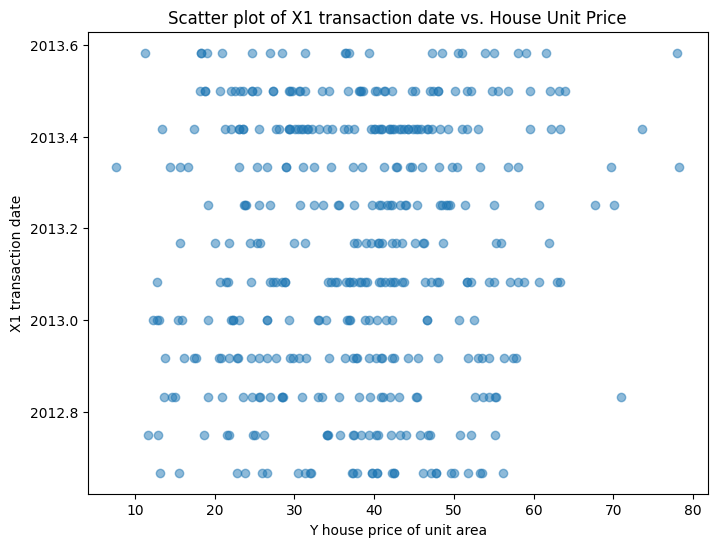

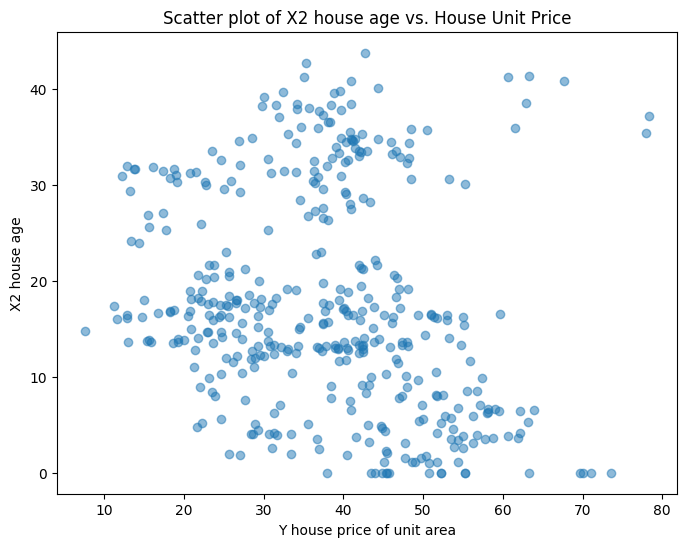

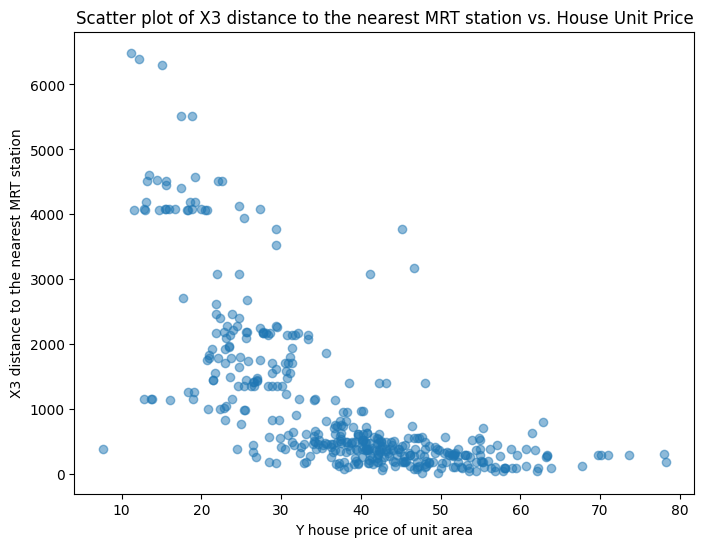

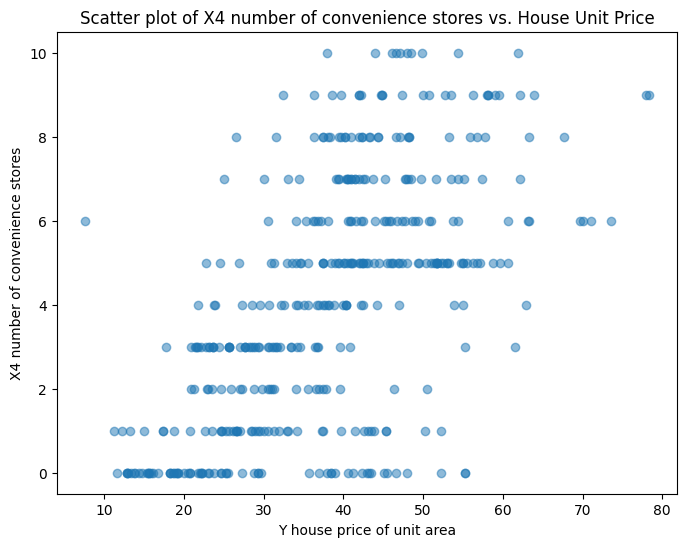

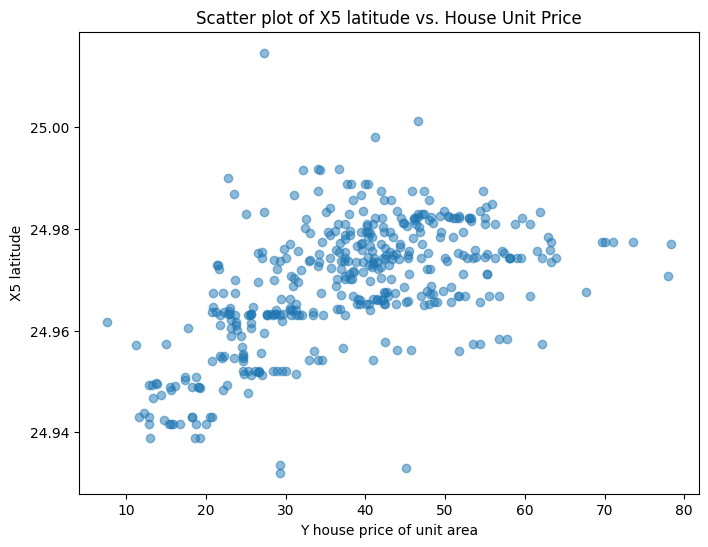

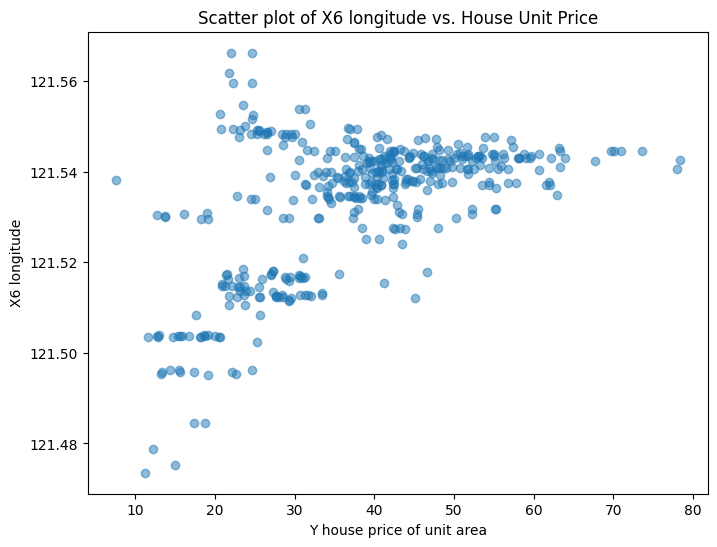

In [3]:
# List of columns to plot against 'house price'
except_col = {'Y house price of unit area', 'No'}
columns_to_plot = [col for col in real_estate.columns if col not in except_col]

for col in columns_to_plot:
    plt.figure(figsize = (8, 6))  
    plt.scatter(real_estate['Y house price of unit area'], real_estate[col], alpha = 0.5)
    plt.title(f'Scatter plot of {col} vs. House Unit Price')
    plt.ylabel(col)
    plt.xlabel('Y house price of unit area')
    plt.show()

#### Choice of Independent Variable

### Model 1: 

Discuss Model 1 here

In [4]:
# Linear Model with Normal Likelihood:
with pm.Model() as linear_model:
    # Priors
    a = pm.Normal('a', mu = 0, sigma = 100)
    b = pm.Normal('b', mu = 0, sigma = 10)
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Function
    mu = a + b* real_estate['X3 distance to the nearest MRT station']
    
    # Likelihood 
    unit_price = pm.Normal('unit_price', mu = mu, sigma = sigma, 
                           observed = real_estate['Y house price of unit area'])
    
    # Sampling
    linear_trace = pm.sample(tune = 1000, draws = 1000, chains = 2)
    
# results
az.summary(linear_trace, var_names = ['a', 'b', 'sigma'])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [a, b, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 35 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,45.569,0.603,44.488,46.781,0.018,0.013,1151.0,1160.0,1.0
b,-0.007,0.000,-0.008,-0.006,0.000,0.000,1051.0,1043.0,1.0
sigma,9.423,0.324,8.859,10.056,0.008,0.006,1596.0,1574.0,1.0


#### Checking the Sampler

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


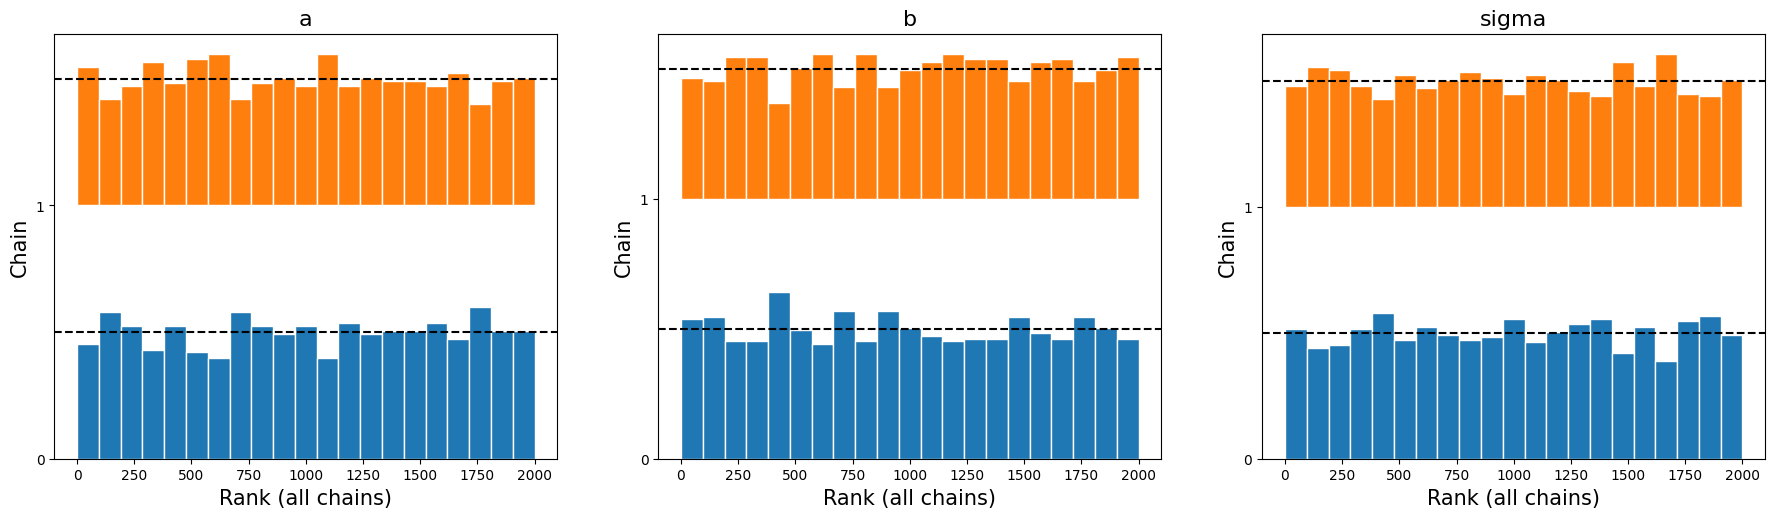

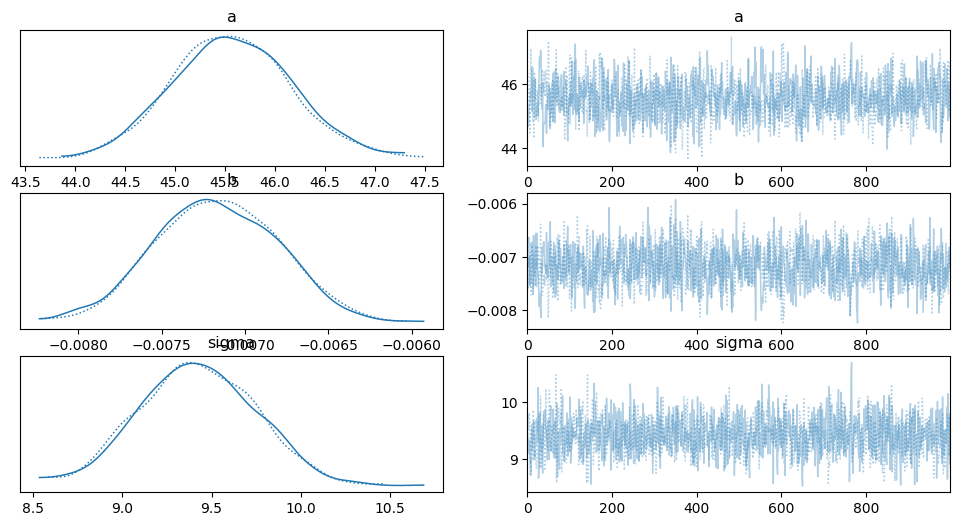

In [5]:
def rank_trace(inference):
    az.plot_rank(inference, var_names=['a', 'b', 'sigma']);
    az.plot_trace(inference, var_names=['a', 'b', 'sigma']);

rank_trace(linear_trace)

interpret rank plots, trace plots and interpret the values of r_hat and ESS, basically the az summary table here

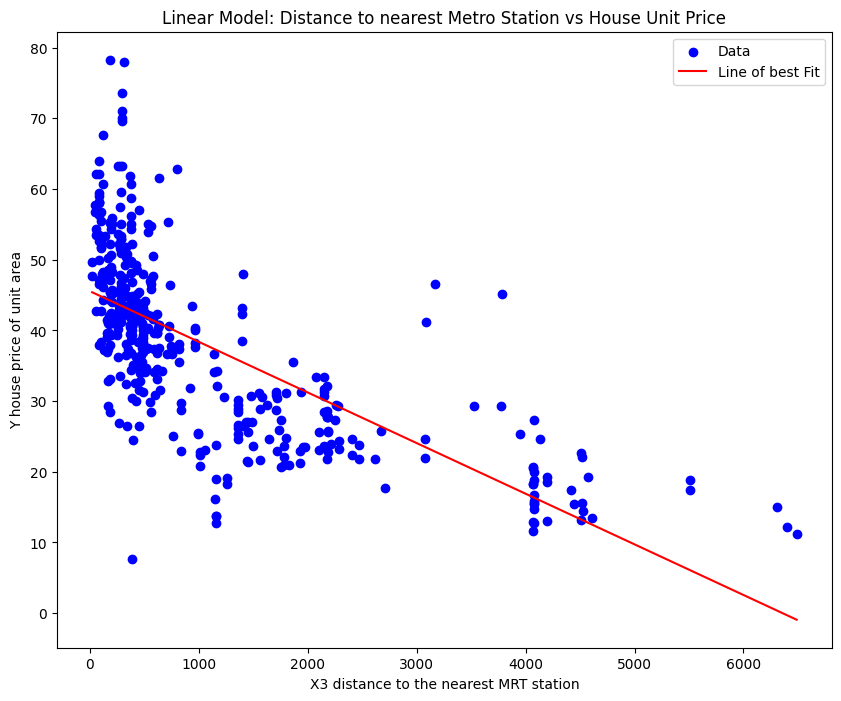

In [6]:
# Compute mean values for alpha and beta
a_samples = linear_trace.posterior["a"].values
b_samples = linear_trace.posterior["b"].values

a_mean = a_samples.mean()
b_mean = b_samples.mean()

# Generate predicted values using the mean parameter estimates
x_vals = np.linspace(min(real_estate['X3 distance to the nearest MRT station']), 
                     max(real_estate['X3 distance to the nearest MRT station']), 100)
y_vals_linear = a_mean + b_mean * x_vals

# Plot the data with line of best fit
plt.figure(figsize=(10, 8))
plt.scatter(real_estate['X3 distance to the nearest MRT station'], 
            real_estate['Y house price of unit area'], 
            c = 'blue', label = 'Data')
plt.plot(x_vals, y_vals_linear, c = 'red', label = 'Line of best Fit')
plt.title('Linear Model: Distance to nearest Metro Station vs House Unit Price')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()

## Model 2: 

Discuss Model 2 here

In [7]:
# Robust Linear Model with Student T likelihood
with pm.Model() as robust_linear_model:
    # Priors
    a = pm.Normal('a', mu = 0, sigma = 100)
    b = pm.Normal('b', mu = 0, sigma = 10)
    nu = pm.Exponential('nu', 1/30) + 1  # degrees of freedom for Student's T
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Function
    mu = a + b * real_estate['X3 distance to the nearest MRT station']
    
    # Likelihood using Student's T
    unit_price = pm.StudentT('unit_price', mu = mu, nu = nu, sigma = sigma, 
                             observed = real_estate['Y house price of unit area'])
    
    # Sampling
    robust_linear_trace = pm.sample(tune = 1000, draws = 1000, chains = 2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [a, b, nu, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


#### Checking the Sampler

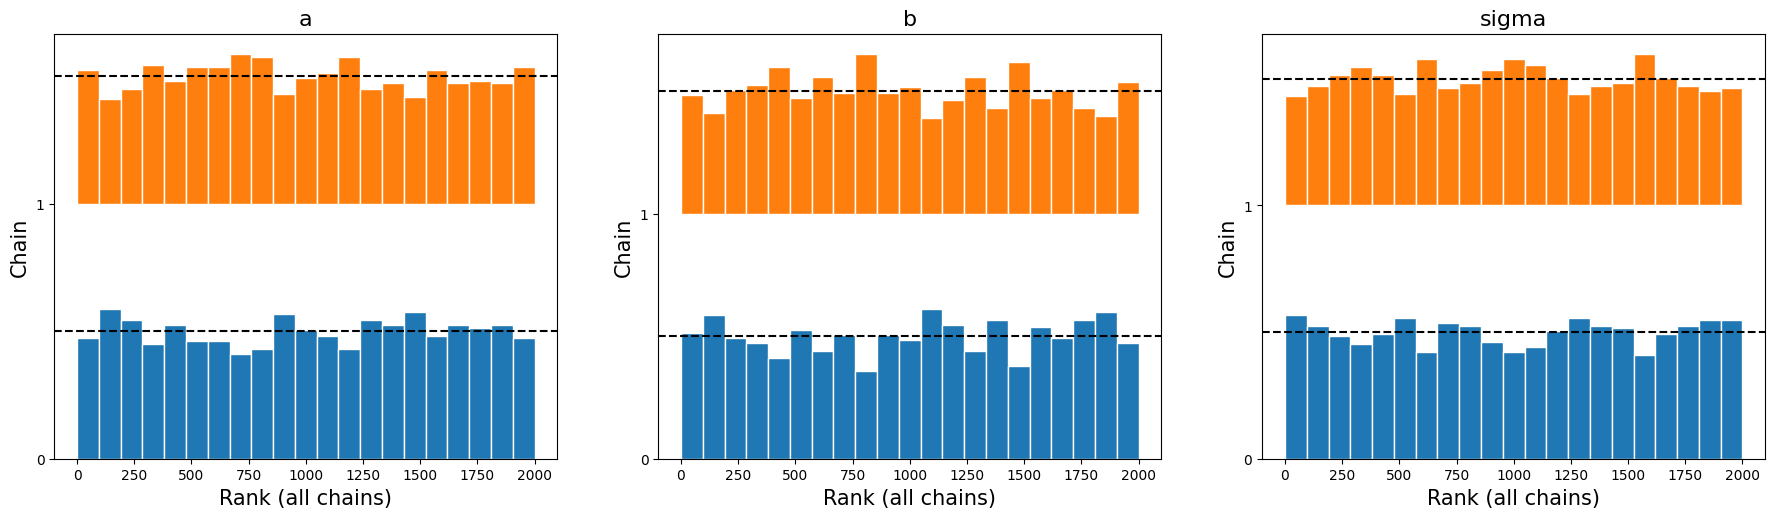

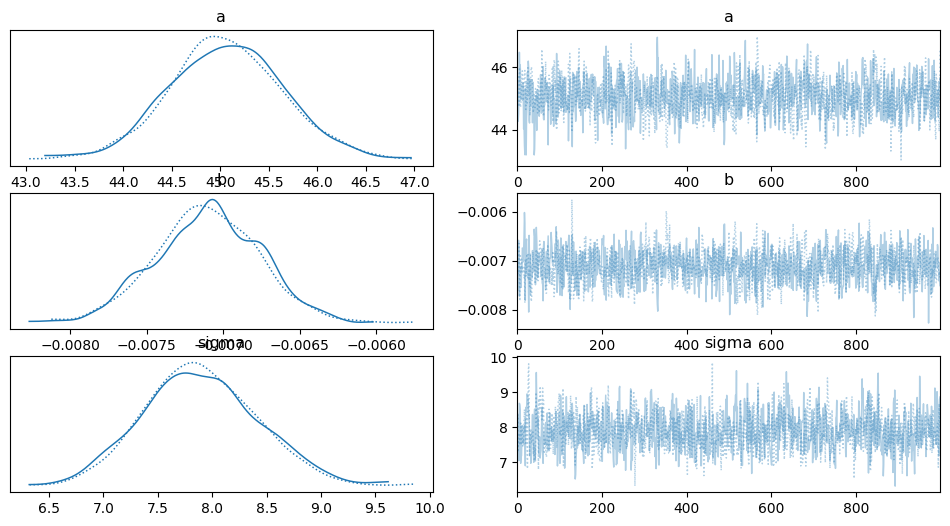

In [8]:
rank_trace(robust_linear_trace)

interpret rank plots, trace plots and interpret the values of r_hat and ESS, basically the az summary table here

### Visualizing the Model fit (Student T Likelihood)

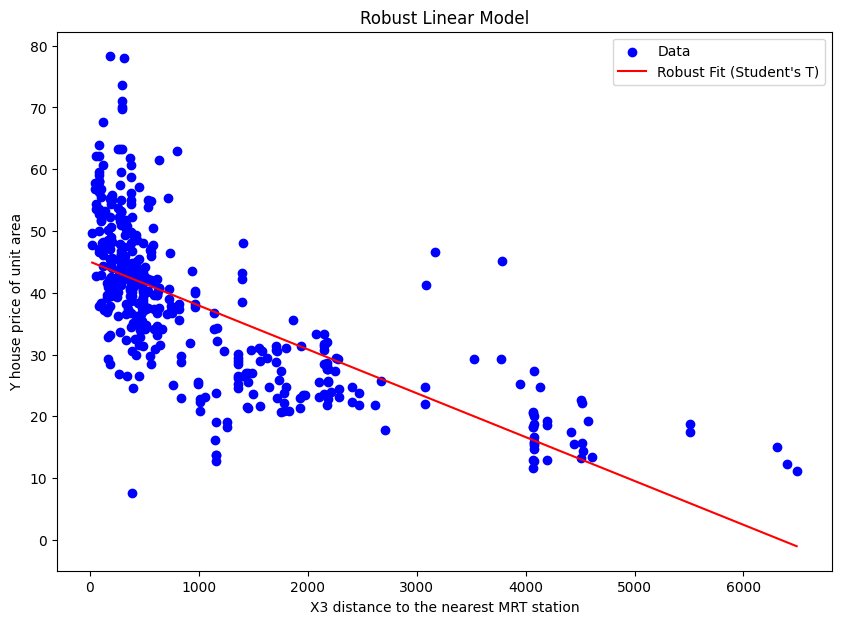

In [9]:
# Compute mean values for alpha and beta
a2_samples = robust_linear_trace.posterior['a'].values
b2_samples = robust_linear_trace.posterior['b'].values

a2_mean = a2_samples.mean()
b2_mean = b2_samples.mean()

# Generate predicted values using the mean parameter estimates
x_vals2 = np.linspace(min(real_estate['X3 distance to the nearest MRT station']), 
                     max(real_estate['X3 distance to the nearest MRT station']), 100)
y_vals_robust = a2_mean + b2_mean * x_vals2

# Plot the data with the line of best fit
plt.figure(figsize=(10, 7))
plt.scatter(real_estate['X3 distance to the nearest MRT station'], 
            real_estate['Y house price of unit area'], 
            c='blue', label='Data')
plt.plot(x_vals, y_vals_robust, c='red', label='Robust Fit (Student\'s T)')
plt.title('Robust Linear Model')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()

interpret the resulsts here or say smth about the model

In [10]:
# Quadratic model
with pm.Model() as quadratic_model:
    # Priors
    a = pm.Normal('a', mu=0, sigma=100)
    b1 = pm.Normal('b1', mu=0, sigma=10)
    b2 = pm.Normal('b2', mu=0, sigma=10)
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Deterministic function
    mu = a + b1 * real_estate['X3 distance to the nearest MRT station'] + b2 * real_estate['X3 distance to the nearest MRT station']**2
    
    # Likelihood
    unit_price = pm.Normal('unit_price', mu = mu, sigma = sigma, 
                        observed = real_estate['Y house price of unit area'])
    
    # Sampling
    trace_quadratic = pm.sample(tune = 1000, draws = 1000, chains = 2)

# Results
print(az.summary(trace_quadratic, var_names=['a', 'b1', 'b2', 'sigma']))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [a, b1, b2, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 51 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a      49.407  0.717  48.147   50.791      0.026    0.018     794.0    1045.0   
b1     -0.015  0.001  -0.017   -0.013      0.000    0.000     841.0     923.0   
b2      0.000  0.000   0.000    0.000      0.000    0.000     900.0    1115.0   
sigma   8.716  0.308   8.150    9.283      0.010    0.007     883.0     870.0   

       r_hat  
a        1.0  
b1       1.0  
b2       1.0  
sigma    1.0  


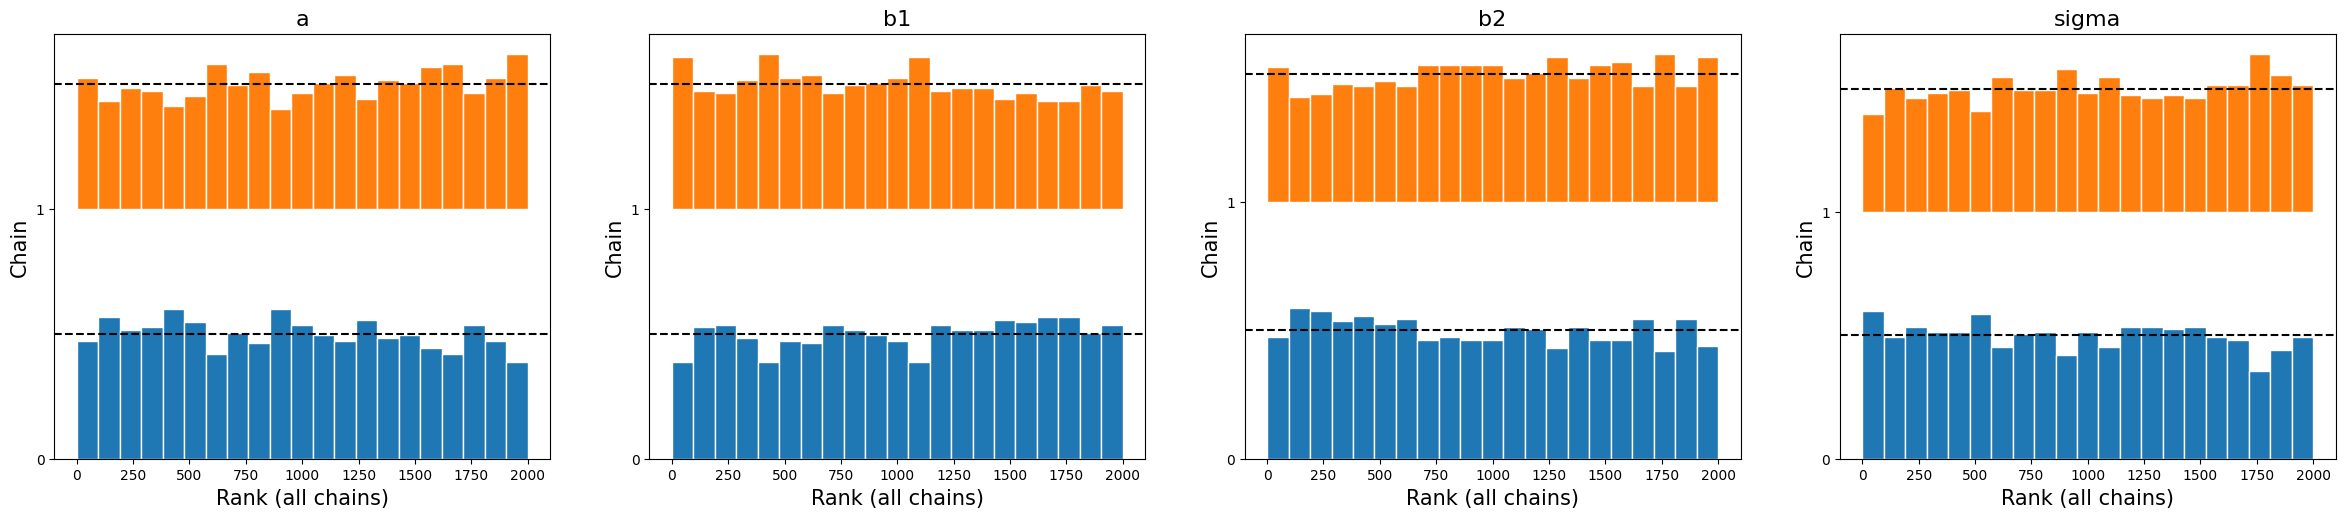

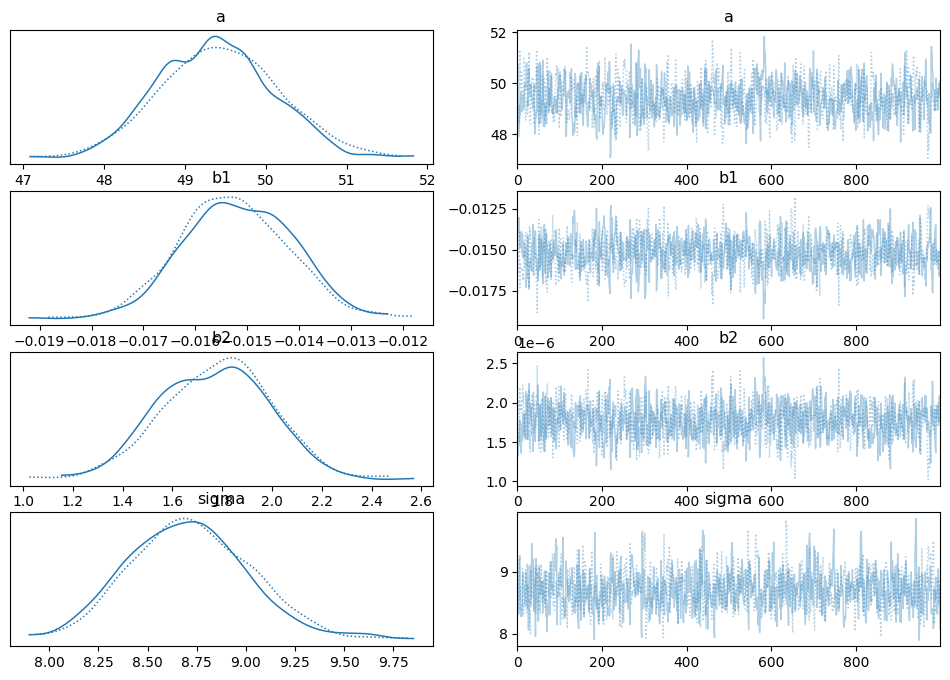

In [11]:
az.plot_rank(trace_quadratic, var_names=['a', 'b1', 'b2', 'sigma']);
az.plot_trace(trace_quadratic, var_names=['a', 'b1', 'b2', 'sigma']);

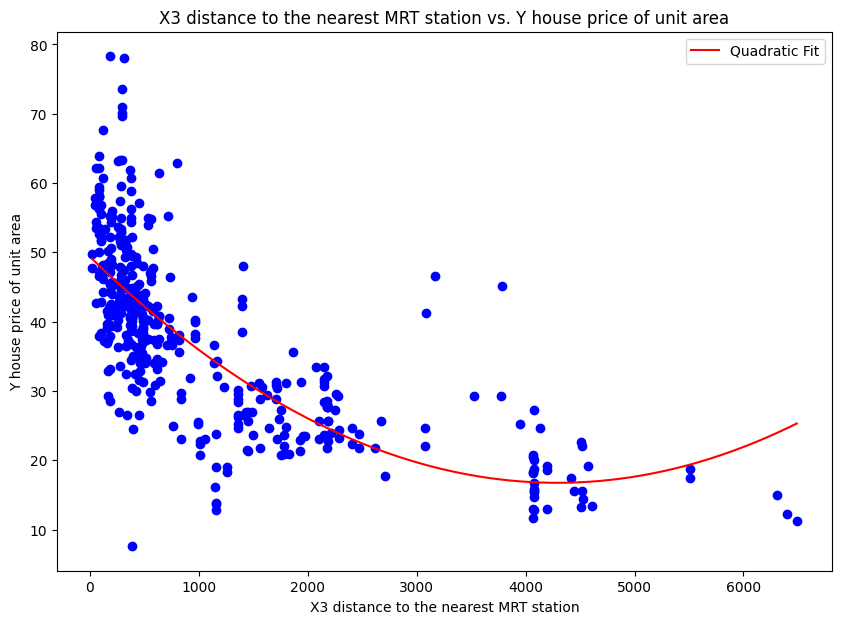

In [12]:
a_samples_q = trace_quadratic.posterior["a"].values
b1_samples = trace_quadratic.posterior["b1"].values
b2_samples = trace_quadratic.posterior["b2"].values

a_mean_q = a_samples_q.mean()
b1_mean = b1_samples.mean()
b2_mean = b2_samples.mean()

# Generate predicted values using the mean parameter estimates
x_vals = np.linspace(min(real_estate['X3 distance to the nearest MRT station']), 
                     max(real_estate['X3 distance to the nearest MRT station']), 100)
y_vals_quadratic = a_mean_q + b1_mean * x_vals + b2_mean * x_vals**2

# Plot the data with lines of best fit
plt.figure(figsize=(10, 7))
plt.scatter(real_estate['X3 distance to the nearest MRT station'], 
            real_estate['Y house price of unit area'], c = 'blue')
plt.plot(x_vals, y_vals_quadratic, c='red', label='Quadratic Fit')
plt.title('X3 distance to the nearest MRT station vs. Y house price of unit area')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()


In [13]:
# Robust Quadratic Model using Student's T distribution
with pm.Model() as robust_quadratic_model:
    # Priors
    a = pm.Normal('a', mu=0, sigma=100)
    b = pm.Normal('b', mu=0, sigma=10)
    c = pm.Normal('c', mu=0, sigma=10)  # quadratic term coefficient
    nu = pm.Exponential('nu', 1/30) + 1  # degrees of freedom for Student's T
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Quadratic function
    mu = a + b * real_estate['X3 distance to the nearest MRT station'] + c * real_estate['X3 distance to the nearest MRT station']**2
    
    # Robust likelihood using Student's T distribution
    unit_price = pm.StudentT('unit_price', mu=mu, nu=nu, sigma=sigma, observed=real_estate['Y house price of unit area'])
    
    # Sampling
    robust_quadratic_trace = pm.sample(tune=1000, draws=1000, chains=2)


# Results
print(az.summary(robust_quadratic_trace, var_names=['a', 'b', 'c', 'nu', 'sigma']))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [a, b, c, nu, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 91 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a      48.754  0.709  47.511   50.090      0.028    0.020     675.0     615.0   
b      -0.015  0.001  -0.017   -0.013      0.000    0.000     569.0     647.0   
c       0.000  0.000   0.000    0.000      0.000    0.000     673.0     896.0   
nu      3.623  1.334   1.616    5.845      0.054    0.039     773.0     787.0   
sigma   6.584  0.442   5.813    7.451      0.017    0.012     696.0     706.0   

       r_hat  
a        1.0  
b        1.0  
c        1.0  
nu       1.0  
sigma    1.0  


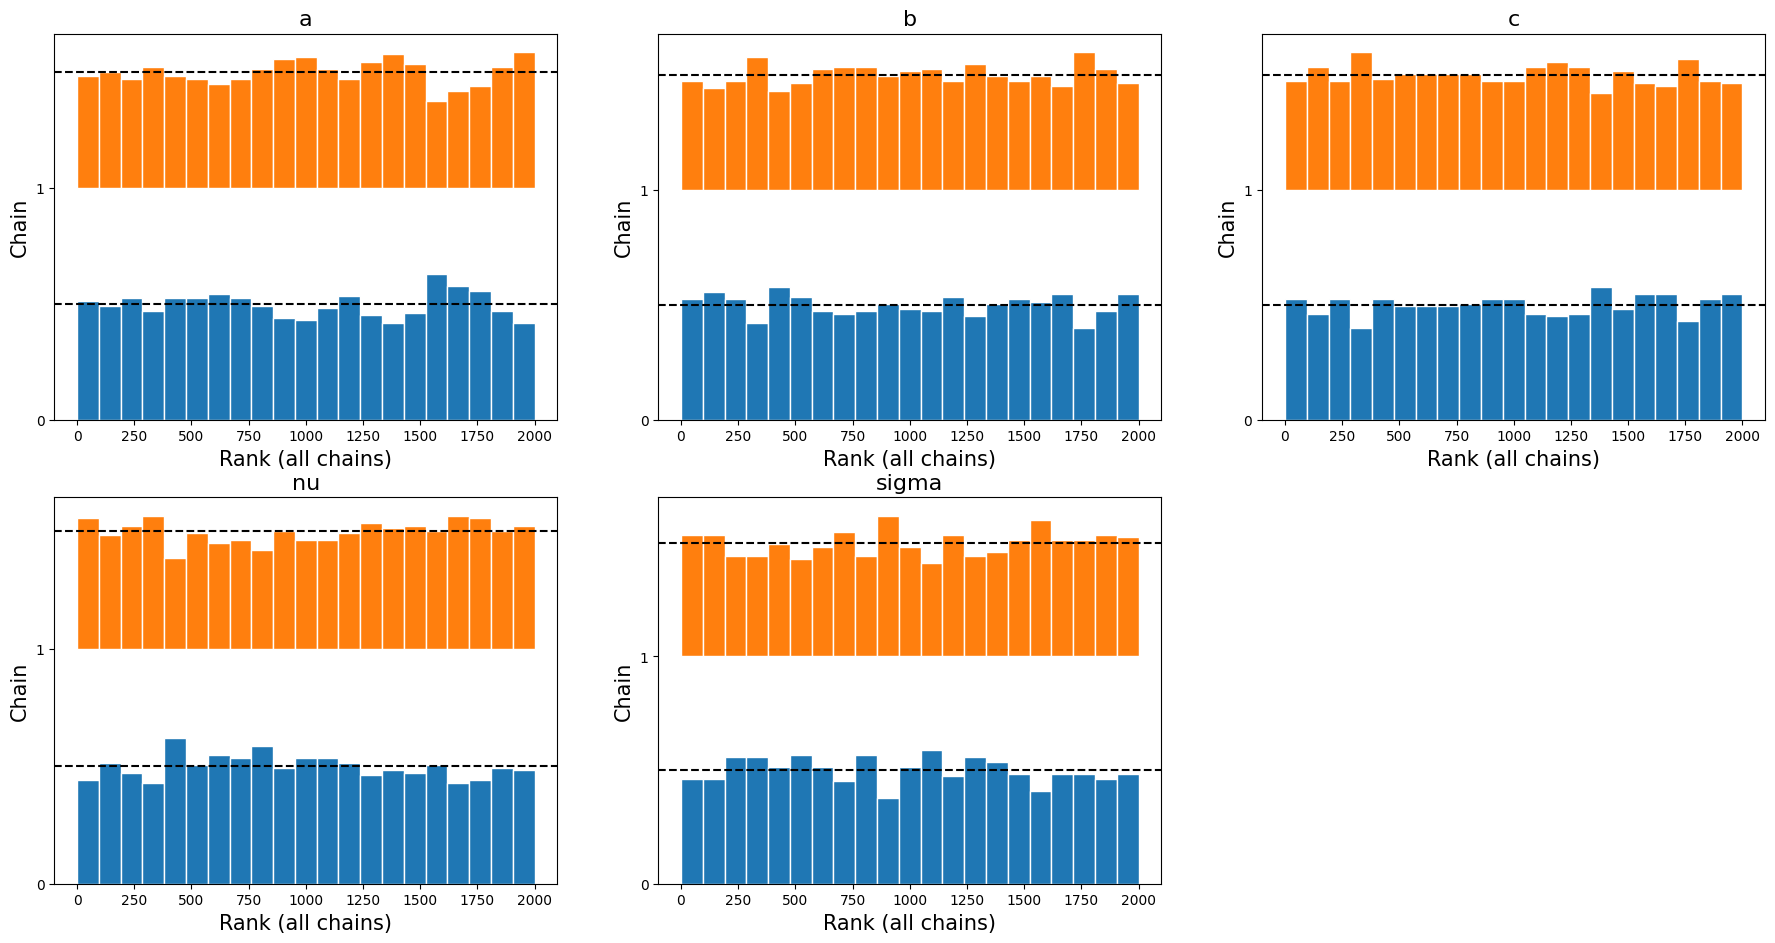

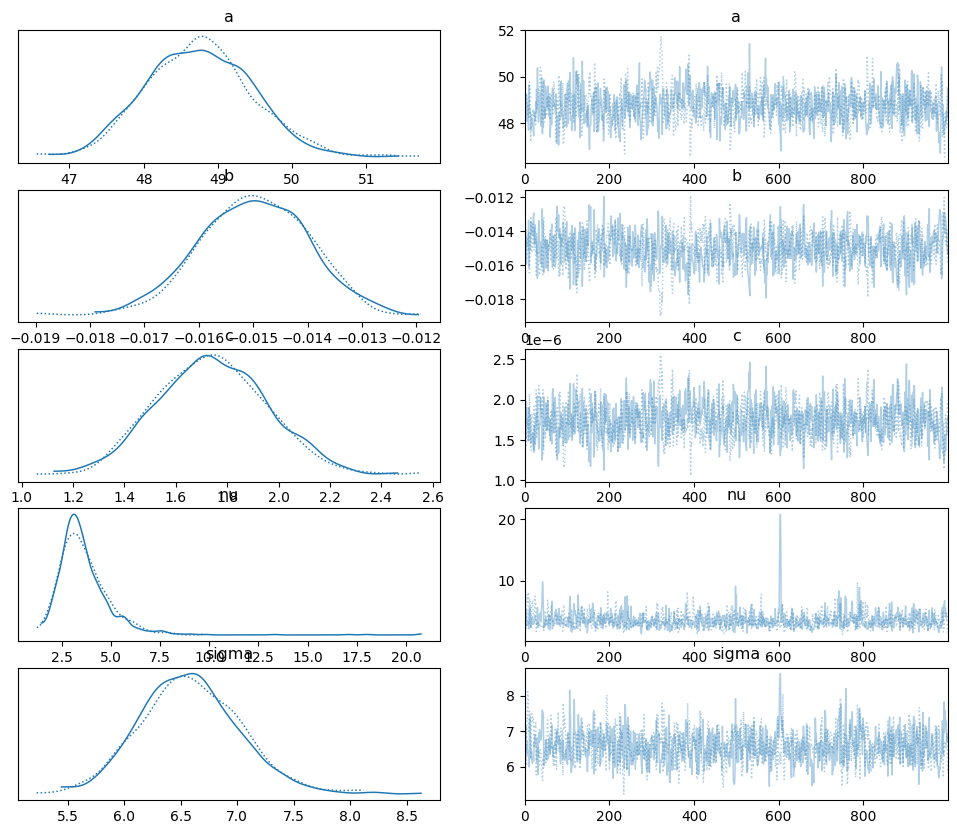

In [14]:
az.plot_rank(robust_quadratic_trace, var_names=['a', 'b', 'c', 'nu', 'sigma']);
az.plot_trace(robust_quadratic_trace, var_names=['a', 'b', 'c', 'nu', 'sigma']);

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


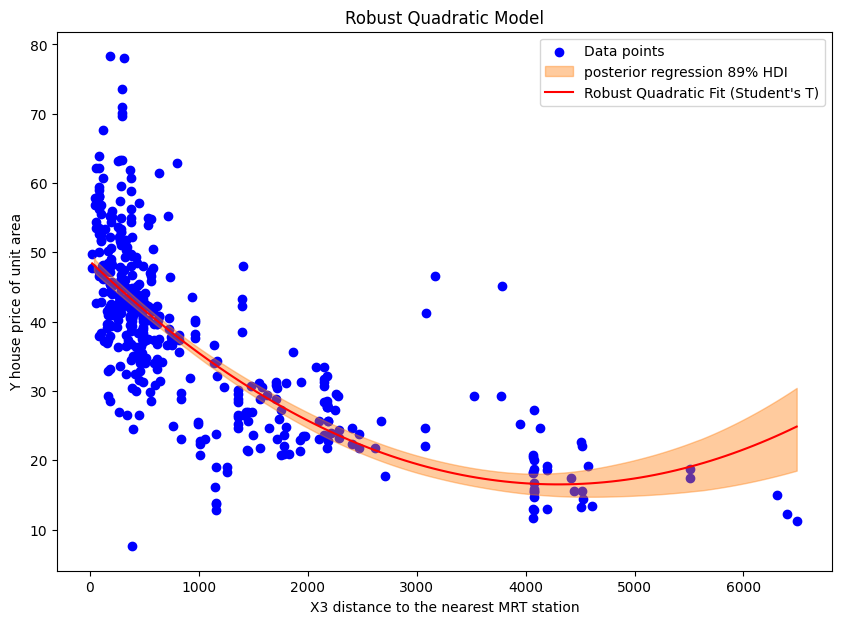

In [40]:
# Extracting mean values for the coefficients from the trace
a3_samples = robust_quadratic_trace.posterior['a'].values.flatten()
b3_samples = robust_quadratic_trace.posterior['b'].values.flatten()
c3_samples = robust_quadratic_trace.posterior['c'].values.flatten()

a3_mean = a3_samples.mean()
b3_mean = b3_samples.mean()
c3_mean = c3_samples.mean()

# Generate predicted values using the mean parameter estimates
x_vals = np.linspace(min(real_estate['X3 distance to the nearest MRT station']), 
                     max(real_estate['X3 distance to the nearest MRT station']), 100)
y_vals_robust_quadratic = a3_mean + b3_mean * x_vals + c3_mean * x_vals**2

# Compute posterior distributions of the predictions
posterior_mu_robust = (a3_samples[:, None] + b3_samples[:, None] * x_vals +
                       c3_samples[:, None] * x_vals**2)

# Plot the data with the line of best fit
plt.figure(figsize=(10, 7))
plt.scatter(real_estate['X3 distance to the nearest MRT station'], 
            real_estate['Y house price of unit area'], c='blue', label='Data points')

# Plot HDI for regression
ax = az.plot_hdi(x_vals, posterior_mu_robust, hdi_prob=0.89, color='C1', fill_kwargs={'alpha': 0.4, 'label': 'posterior regression 89% HDI'})

plt.plot(x_vals, y_vals_robust_quadratic, c='red', label='Robust Quadratic Fit (Student\'s T)')
plt.title('Robust Quadratic Model')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()

## Model 3: Outlier Detection Likelihood 

Discuss model 3 here

In [16]:
import pytensor.tensor as pt

# Extracting data columns
data_x = real_estate['X3 distance to the nearest MRT station'].values
data_y = real_estate['Y house price of unit area'].values

with pm.Model() as outlier_model:
    
    # Observed variables
    x = pm.MutableData('x', data_x)
    y = pm.MutableData('y', data_y)
    
    # Quadratic regression parameters
    c0 = pm.Uniform('c0', lower=0, upper=100)
    c1 = pm.Normal('c1', mu=0, sigma=5)
    c2 = pm.Normal('c2', mu=0, sigma=5)
    mu = pm.Deterministic('mu', c0 + c1 * x + c2 * x**2)
    
    # Noise parameters for inliers and outliers
    sigma = pm.Uniform('sigma', lower=0, upper=100)
    sigma_out = pm.HalfNormal('sigma_out', sigma=30)
    sigmas = pm.math.stack([sigma, sigma + sigma_out])

    # In/out class assignment probability and indicators
    p = pm.Uniform('p', lower=0, upper=0.5)
    is_outlier = pm.Bernoulli('is_outlier', p=p, size=x.shape[0])
    
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigmas[is_outlier], observed=y)

    # Sampling
    trace = pm.sample(2000, tune=1000, chains=2)


Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>NUTS: [c0, c1, c2, sigma, sigma_out, p]
>BinaryGibbsMetropolis: [is_outlier]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 177 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,48.740,0.682,47.465,49.975,0.025,0.018,753.0,1281.0,1.00
c1,-0.015,0.001,-0.017,-0.013,0.000,0.000,746.0,1172.0,1.00
sigma,5.625,0.603,4.566,6.809,0.050,0.035,145.0,252.0,1.03
sigma_out,7.680,1.325,5.427,10.067,0.077,0.055,312.0,578.0,1.00
p,0.323,0.090,0.179,0.496,0.008,0.006,118.0,258.0,1.02


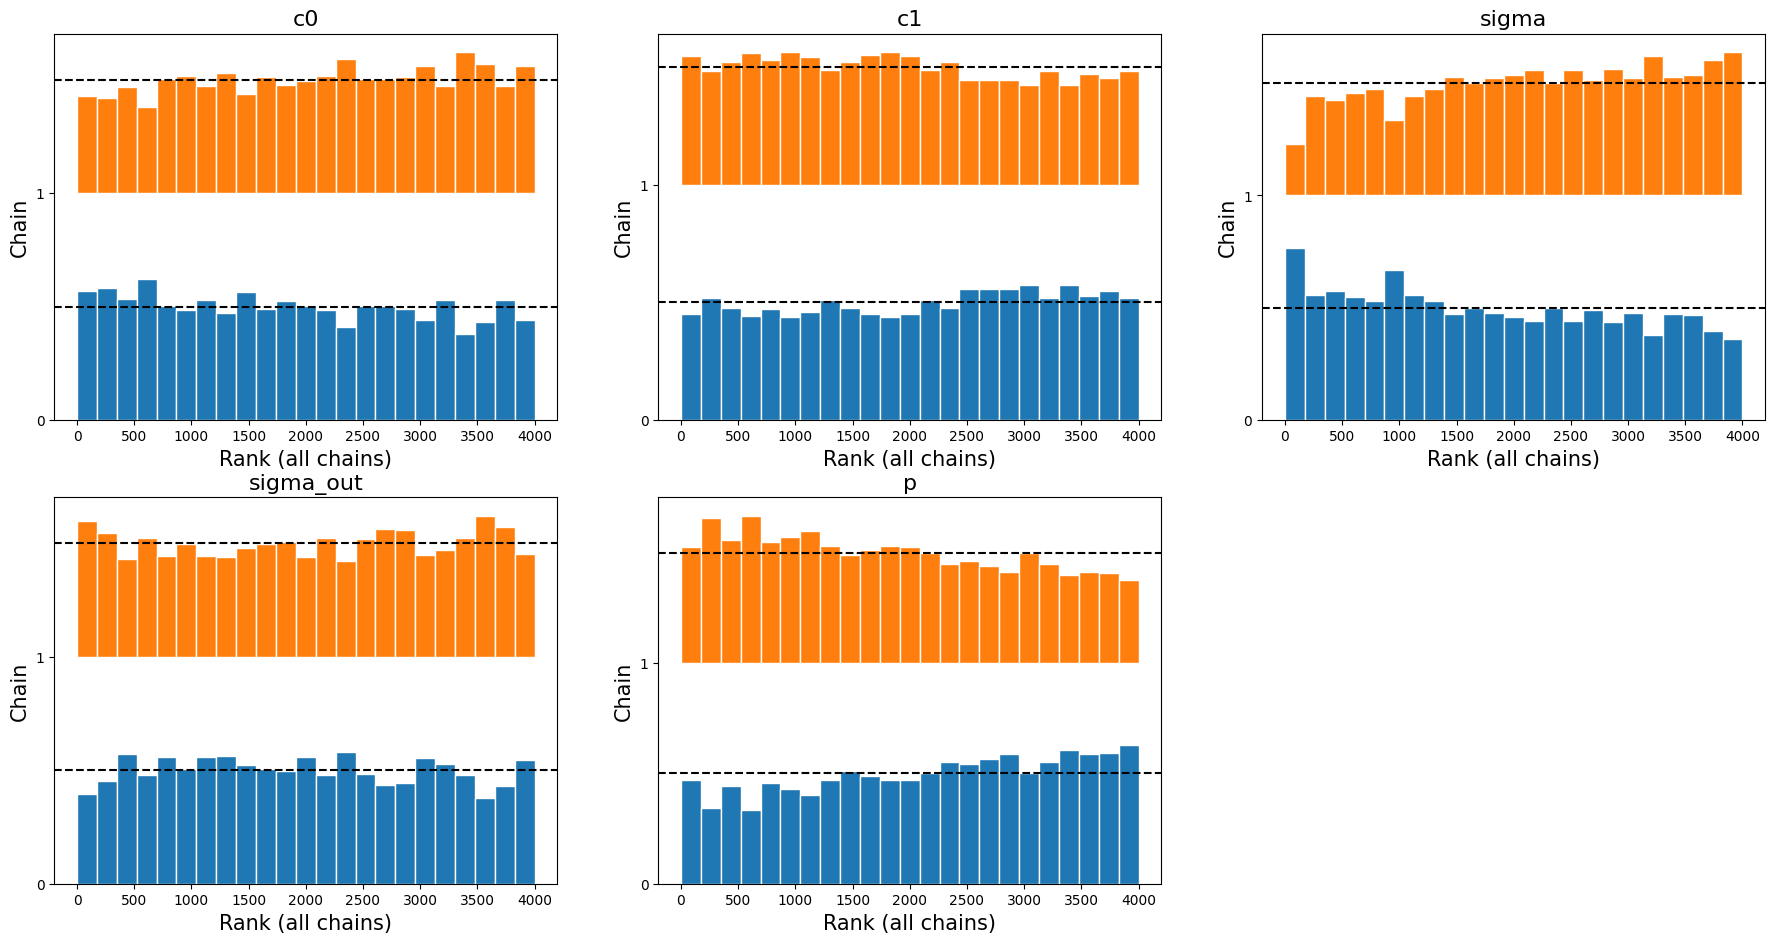

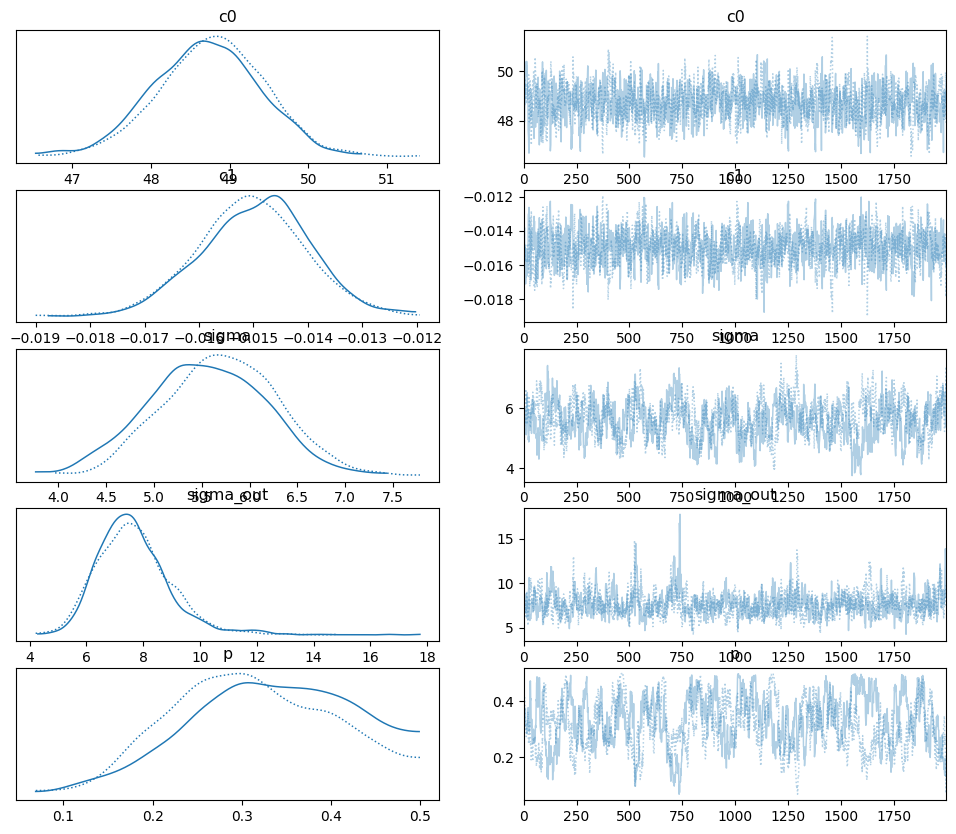

In [17]:
az.plot_rank(trace, var_names=['c0', 'c1', 'sigma', 'sigma_out', 'p'])
az.plot_trace(trace, var_names=['c0', 'c1', 'sigma', 'sigma_out', 'p'])
az.summary(trace, var_names=['c0', 'c1', 'sigma', 'sigma_out', 'p'])


/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


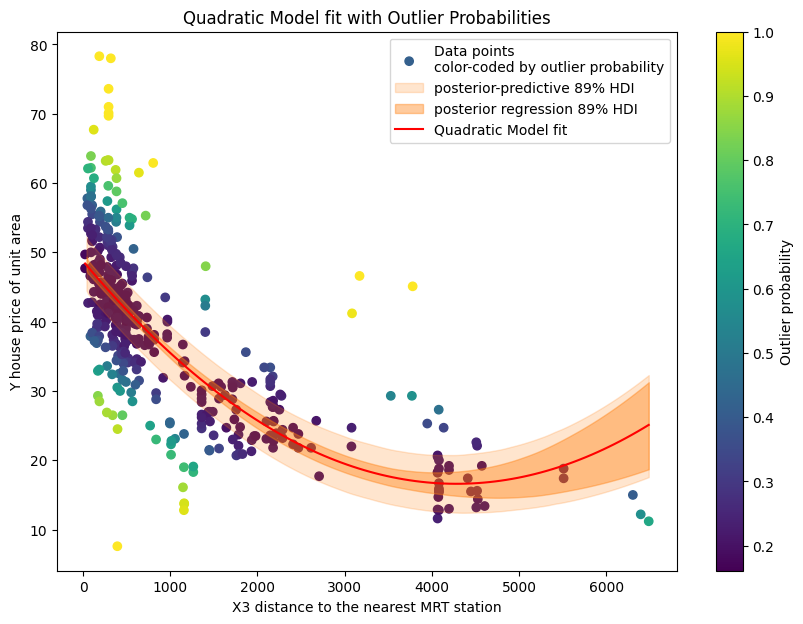

In [25]:
# Extracting mean values for the coefficients from the trace
c0_samples = trace.posterior['c0'].values.flatten()
c1_samples = trace.posterior['c1'].values.flatten()
c2_samples = trace.posterior['c2'].values.flatten()

c0_mean = c0_samples.mean()
c1_mean = c1_samples.mean()
c2_mean = c2_samples.mean()

# Predicted values using the mean parameter estimates
x_vals = np.linspace(min(data_x), max(data_x), 100)
y_pred = c0_mean + c1_mean * x_vals + c2_mean * x_vals**2

# Compute posterior distributions of the predictions
posterior_mu = (c0_samples[:, None] + c1_samples[:, None] * x_vals +
                c2_samples[:, None] * x_vals**2)
posterior_y = np.random.normal(posterior_mu, np.sqrt(trace.posterior['sigma'].values.flatten())[:, None])

# Probability of each data point being an outlier
outlier_prob = trace.posterior['is_outlier'].values.mean(axis=(0, 1))

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(data_x, data_y, c=outlier_prob, cmap='viridis', label='Data points\ncolor-coded by outlier probability')

# Plot HDI for regression and posterior predictions
ax = az.plot_hdi(x_vals, posterior_y, hdi_prob=0.89, color='C1', fill_kwargs={'alpha': 0.2, 'label': 'posterior-predictive 89% HDI'})
az.plot_hdi(x_vals, posterior_mu, ax=ax, hdi_prob=0.89, color='C1', fill_kwargs={'alpha': 0.4, 'label': 'posterior regression 89% HDI'})

plt.plot(x_vals, y_pred, 'r-', label='Quadratic Model fit')
plt.colorbar(label='Outlier probability')
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('Quadratic Model fit with Outlier Probabilities')
plt.legend()
plt.show()


## Comparison of the 3 Models: PSIS leave-one-out cross-validation

Discuss what you are going to do to compare the three models

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


WAIC for Linear Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  3027.87    37.05
p_waic            3.55        -
WAIC for Robust Linear Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  3012.49    36.31
p_waic            4.29        -
WAIC for Quadratic Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  2964.90    40.92
p_waic            4.90        -

There has been a warning during the calculation. Please check the results.
WAIC for Robust Quadratic Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  2930.66    38.97
p_waic            5.35        -

There has been a warning during the calculation. Please check the results.
WAIC for Outlier Model: 

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                  rank    elpd_waic     p_waic  elpd_diff        weight  \
Outlier              0 -1446.700113  57.046758   0.000000  1.000000e+00   
Robust Quadratic     1 -1465.331149   5.349609  18.631035  3.737882e-11   
Quadratic            2 -1482.452254   4.897825  35.752141  2.740280e-11   
Robust Linear        3 -1506.242757   4.287861  59.542644  3.065825e-12   
Linear               4 -1513.933177   3.550667  67.233064  0.000000e+00   

                         se       dse  warning scale  
Outlier           16.496860  0.000000     True   log  
Robust Quadratic  19.484836  4.586410     True   log  
Quadratic         20.457748  9.531896     True   log  
Robust Linear     18.156054  7.117371    False   log  
Linear            18.522811  9.148414    False   log  


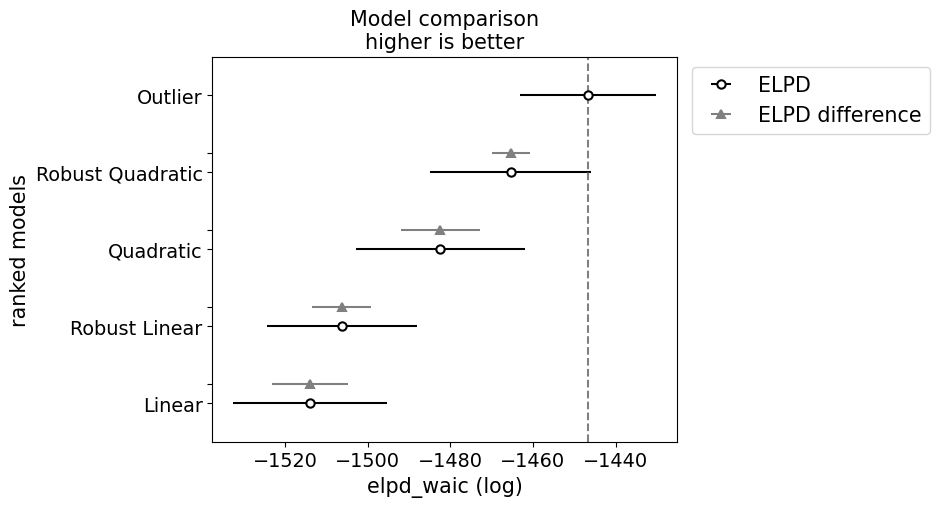

In [21]:
# Compute log likelihood and WAIC for Linear Model
with linear_model:
    pm.compute_log_likelihood(linear_trace)
waic_linear = az.waic(linear_trace, scale='deviance')

# Compute log likelihood and WAIC for Robust Linear Model
with robust_linear_model:
    pm.compute_log_likelihood(robust_linear_trace)
waic_robust_linear = az.waic(robust_linear_trace, scale='deviance')

# Compute log likelihood and WAIC for Quadratic Model
with quadratic_model:
    pm.compute_log_likelihood(trace_quadratic)
waic_quadratic = az.waic(trace_quadratic, scale='deviance')

# Compute log likelihood and WAIC for Robust Quadratic Model
with robust_quadratic_model:
    pm.compute_log_likelihood(robust_quadratic_trace)
waic_robust_quadratic = az.waic(robust_quadratic_trace, scale='deviance')

# Compute log likelihood and WAIC for Outlier Model
with outlier_model:
    pm.compute_log_likelihood(trace)
waic_outlier = az.waic(trace, scale='deviance')

WAIC for Linear Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  3027.87    37.05
p_waic            3.55        -
WAIC for Robust Linear Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  3012.49    36.31
p_waic            4.29        -
WAIC for Quadratic Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  2964.90    40.92
p_waic            4.90        -

There has been a warning during the calculation. Please check the results.
WAIC for Robust Quadratic Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  2930.66    38.97
p_waic            5.35        -

There has been a warning during the calculation. Please check the results.
                  rank  

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


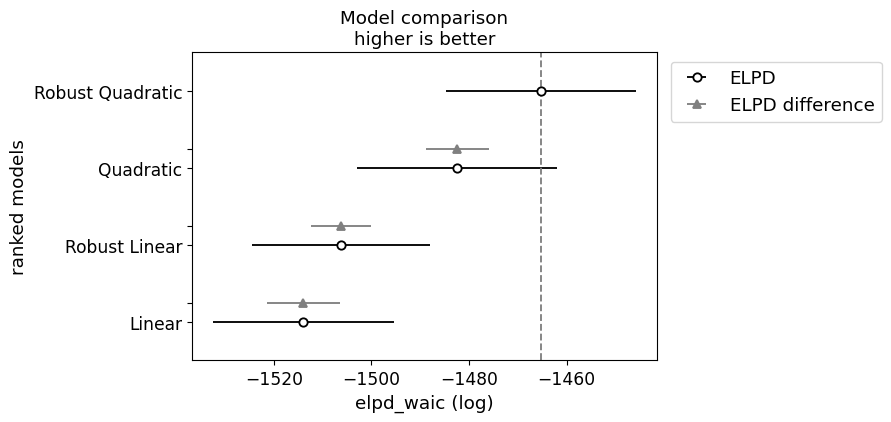

In [48]:
# Print WAIC for each model
print("WAIC for Linear Model:", waic_linear)
print("WAIC for Robust Linear Model:", waic_robust_linear)
print("WAIC for Quadratic Model:", waic_quadratic)
print("WAIC for Robust Quadratic Model:", waic_robust_quadratic)

# Compare the models using arviz.compare
comparison = az.compare({
    'Linear': linear_trace,
    'Robust Linear': robust_linear_trace,
    'Quadratic': trace_quadratic,
    'Robust Quadratic': robust_quadratic_trace,
}, ic='waic')

print(comparison)

# Visualizing the comparison
az.plot_compare(comparison)
plt.show()


In [50]:
# For Linear Model
loo_linear = az.loo(linear_trace, pointwise=True, scale='deviance')

# For Robust Linear Model
loo_robust_linear = az.loo(robust_linear_trace, pointwise=True, scale='deviance')

# For Quadratic Model
loo_quadratic = az.loo(trace_quadratic, pointwise=True, scale='deviance')

# For Robust Quadratic Model
loo_robust_quadratic = az.loo(robust_quadratic_trace, pointwise=True, scale='deviance')

# For Outlier Model
loo_outlier = az.loo(trace, pointwise=True, scale='deviance')


/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [51]:
print("PSIS-LOO for Linear Model:", loo_linear)
print("PSIS-LOO for Robust Linear Model:", loo_robust_linear)
print("PSIS-LOO for Quadratic Model:", loo_quadratic)
print("PSIS-LOO for Robust Quadratic Model:", loo_robust_quadratic)
print("PSIS-LOO for Outlier Model:", loo_outlier)


PSIS-LOO for Linear Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

             Estimate       SE
deviance_loo  3027.88    37.05
p_loo            3.56        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      413  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

PSIS-LOO for Robust Linear Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

             Estimate       SE
deviance_loo  3012.53    36.32
p_loo            4.31        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      413  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

PSIS-LOO for Quadratic Model: Computed from 2000 posterior samples and 413 observations log-likelihood matrix.

             Estimate  

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                  rank     elpd_loo      p_loo  elpd_diff        weight  \
Outlier              0 -1456.593919  66.940564   0.000000  9.132861e-01   
Robust Quadratic     1 -1465.341853   5.360313   8.747933  1.758971e-12   
Quadratic            2 -1482.470705   4.916276  25.876786  8.671387e-02   
Robust Linear        3 -1506.263479   4.308583  49.669560  0.000000e+00   
Linear               4 -1513.938740   3.556231  57.344821  0.000000e+00   

                         se       dse  warning scale  
Outlier           17.720701  0.000000     True   log  
Robust Quadratic  19.485743  4.283739    False   log  
Quadratic         20.458459  9.631262    False   log  
Robust Linear     18.159179  7.241303    False   log  
Linear            18.523355  9.404697    False   log  


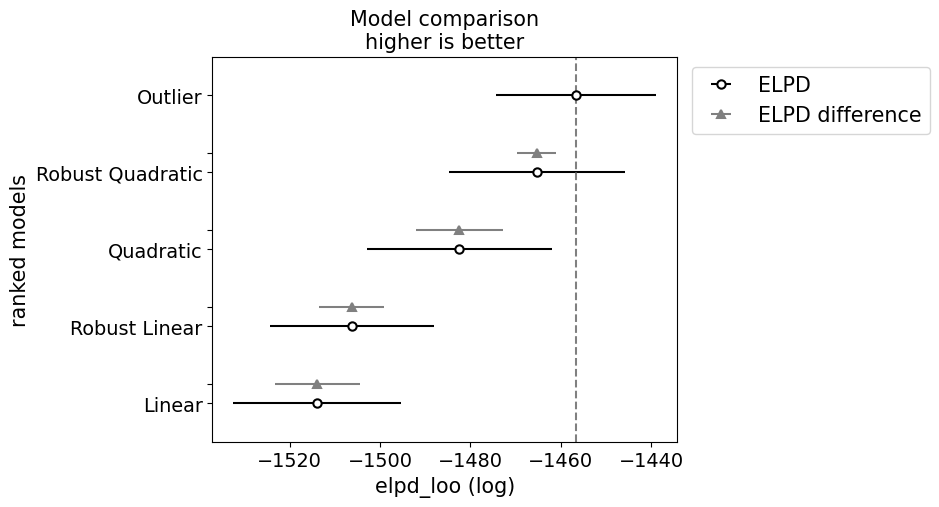

In [52]:
# Compare the models using arviz.compare
comparison_loo = az.compare({
    'Linear': linear_trace,
    'Robust Linear': robust_linear_trace,
    'Quadratic': trace_quadratic,
    'Robust Quadratic': robust_quadratic_trace,
    'Outlier': trace
}, ic='loo')

print(comparison_loo)

# Visualizing the comparison
az.plot_compare(comparison_loo)
plt.show()


## References

references go here

#### AI Policy Statement

Your Statement Goes Here